<center> <h1>基于Python的游戏门槛位置 A/B 测试分析</h1> </center>




<center><img
src="https://tactilegames.com/wp-content/uploads/2023/03/TT_Header_CookieCats_UW_Up-scaled.webp" style="width:100%;height:100%;">
</center>
    
In the realm of mobile gaming, maintaining player engagement is paramount. “Cookie Cats,” a captivating puzzle game developed by Tactile Entertainment, serves as an excellent case study for this. The game’s clever integration of “connect three” mechanics with an adorable ensemble of singing cats has charmed players worldwide. However, the strategic placement of progression gates — points where players must either wait or make a purchase to advance — brings a crucial analytical challenge to the forefront: optimizing player retention.

## Understanding the Game Mechanics

At its core, “Cookie Cats” employs a common yet effective monetization strategy: progression gates. These gates, strategically placed at certain levels, necessitate either a waiting period or an in-app purchase, ingeniously pacing the gameplay. This mechanic not only drives revenue but also aims to enhance the player’s enjoyment by preventing burnout.

## The Analytical Challenge: Gate Placement

The initial placement of the first gate at level 30 posed an interesting question: could player retention be improved by relocating this gate? To explore this, an AB test was conducted, shifting the first gate to level 40 for a subset of players. The goal was to analyze the impact on player retention, an essential metric for the game’s long-term success.

## Data-Driven Insights with Python

Leveraging Python, a powerful tool for data analysis, we delved into the game’s AB test data, encompassing 90,189 players. The data included metrics such as the number of game rounds played within the first 14 days post-installation and retention rates one and seven days after installation. Python’s Pandas library facilitated efficient data manipulation and analysis, allowing for a clear comparison between the control group (gate at level 30) and the test group (gate at level 40).

## Bootstrap Analysis: A Closer Look at Retention Rates

Bootstrap analysis, a robust statistical method, was employed to assess the certainty of our findings. By resampling the dataset and calculating retention rates, we could estimate the variability of our metrics. This analysis revealed a slight decrease in 1-day retention for the level 40 gate, a small but significant insight given the impact of retention on player base and revenue.

## Visualizing Data with Python

Data visualization played a pivotal role in our analysis. Using Python’s Matplotlib library, we plotted the distribution of game rounds played and the bootstrap analysis results, offering a clear, visual representation of our findings. These visualizations not only made the data more accessible but also highlighted the nuanced effects of gate placement on player engagement.

## Strategic Decision-Making: To Move or Not to Move the Gate?

The culmination of our analysis pointed to a clear conclusion: moving the gate to level 40 adversely affected player retention. This insight, grounded in rigorous data analysis and bootstrap analysis, underscores the importance of data-driven decision-making in game development and monetization strategies.

## The Power of AB Testing and Data Analysis

This case study exemplifies the critical role of AB testing and data analysis in optimizing player engagement and retention. By leveraging Python for data manipulation, analysis, and visualization, we can derive actionable insights that inform strategic decisions. For game developers and analysts alike, embracing these tools and techniques is essential for fostering a vibrant, engaged player base.




In [1]:
from IPython.display import display, HTML

# 这里替换为你想要嵌入的视频的ID
video_id = 'GaP5f0jVTWE'

# 创建 iframe HTML 代码
iframe_html = f'''
<iframe width="560" height="315" src="https://www.youtube.com/embed/{video_id}"
frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope;
picture-in-picture" allowfullscreen></iframe>
'''

# 在 Jupyter Notebook 中显示视频
display(HTML(iframe_html))



## 项目背景 <a name= '1'></a>



**Cookie Cats 是什么？**

"Cookie Cats" 是一款移动游戏，由 Tactile Entertainment 开发和发布。游戏的玩法类似于其他消除类游戏（消消乐）

玩家在游戏中可能会遇到一些障碍，比如需要等待才能继续玩，或者得花钱买道具才能过关。假设你在玩游戏时，遇到了一些关卡需要等一段时间解锁，或者需要购买道具才能过关。

在这个项目中，我们要分析的是一个A/B测试的结果。A/B测试是一种常用的实验设计方法，其中一组人（组A）会体验到一种情况，另一组人（组B）会体验到另一种情况。在这个例子中，我们将Cookie Cats游戏中的第一个门槛从<font color = blue>30级移到40级</font>，然后分析这个改变对玩家的影响。

我们主要关注两个方面：玩家的留存率和游戏轮次。

1. <font color = red>留存率</font>指的是玩家在游戏中的持续参与程度，即他们是否会在一段时间后继续玩游戏。
2. <font color = red>游戏轮次</font>指的是玩家在游戏中进行的游戏回合或关卡。通过分析这些数据，我们可以了解改变关卡位置对玩家的行为产生了什么影响。

完成这个项目需要一些基本技能：

- <font color = red>使用 pandas：</font>Pandas 是一个流行的 Python 库，用于数据处理和分析。DataFrames 是 Pandas 中的一种数据结构，类似于 Excel 表格，可以方便地存储和操作数据。比如，你可以使用 Pandas 从 CSV 文件中加载数据，并对数据进行筛选、分组、排序等操作。例子：假设你有一个包含学生成绩的 CSV 文件，你可以使用 Pandas 将其加载到 DataFrame 中，并通过 DataFrame 的方法计算平均成绩、筛选出及格的学生等。
- <font color = red>使用相关画图方法：</font>Pandas 可以使用 matplotlib 和 seaborn 进行数据可视化。绘制各种图表，如折线图、柱状图等。尤其是绘制distribution plot的时候。
- <font color = red>了解不同类型指标的假设检验逻辑和 bootstrap 分析：</font>假设检验用于判断玩家留存率和游戏轮次的差异是否显著。Bootstrap 分析通过重抽样估计这些指标的统计量分布。比如，比较两组玩家的平均留存率是否显著不同，可以使用假设检验。如果要估计留存率的置信区间，可以使用 Bootstrap 方法。


### 数据描述 <a name= '2'></a>

数据集是从某个正在运行 A/B 测试的游戏中收集的，共有 90,189 名玩家在进行 A/B 测试期间安装了游戏。

1. **userid**：每个玩家的唯一标识号，用来区分不同的玩家。

   例子：假设有玩家A、玩家B和玩家C，他们的userid分别是123、456和789。

2. **version**：玩家所属的实验组，控制组或测试组。

   - **gate_30**：表示玩家被分配到了实验组，他们在游戏中的第一个关卡在30级。
   - **gate_40**：表示玩家被分配到了测试组，他们在游戏中的第一个关卡在40级。

   例子：玩家A被分配到了gate_30组，而玩家B被分配到了gate_40组。

3. **sum_gamerounds**：玩家在安装游戏后的第一个星期内玩了多少个游戏回合。

   例子：玩家A在第一个星期玩了10个游戏回合，而玩家B玩了20个游戏回合。

4. **retention_1**：玩家在安装游戏后的第一天是否再次登陆游戏。

   - **1**：表示玩家在第一天再次登陆游戏。
   - **0**：表示玩家在第一天没有再次登陆游戏。

   例子：玩家A在第一天没有再次登陆游戏，而玩家B再次登陆了游戏。

5. **retention_7**：玩家在安装游戏后的第七天是否再次登陆游戏。

   - **1**：表示玩家在第七天再次登陆游戏。
   - **0**：表示玩家在第七天没有再次登陆游戏。

   例子：玩家A在第七天再次登陆了游戏，而玩家B没有再次登陆游戏。

### AB测试流程

一个完整的A/B test主要包括如下几部分：

1、分析现状，建立假设：分析业务，确定最高优先级的改进点，作出假设，提出优化建议。

2、设定指标：设置主要指标来衡量版本的优劣；设置辅助指标来评估其他影响。

3、设计与开发：设计优化版本的原型并完成开发。

4、确定测试时长：确定测试进行的时长。

5、确定分流方案：确定每个测试版本的分流比例及其他分流细节。

6、采集并分析数据：收集实验数据，进行有效性和效果判断。

7、给出结论：①确定发布新版本；②调整分流比例继续测试；③优化迭代方案重新开发，回到步骤1。

![](https://static.wingify.com/gcp/uploads/2021/05/6-1024x444.png)

## 项目步骤

### 1. 导入模块

In [2]:
# 基础
# -----------------------------------
# 导入必要的库
import numpy as np  # 导入NumPy库
import pandas as pd  # 导入Pandas库
import seaborn as sns  # 导入Seaborn库
import matplotlib.pyplot as plt  # 导入Matplotlib库
import os  # 导入os模块

# 假设检验
# -----------------------------------
# 导入Shapiro-Wilk正态性检验函数
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, levene
import scipy.stats as stats  # 导入SciPy统计模块
import statsmodels.stats.api as sms

# 配置
from tqdm import tqdm
# -----------------------------------
# 忽略警告
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# 设置Pandas显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.options.display.float_format = '{:.4f}'.format  # 设置浮点数显示格式

### 2. 数据清洗&分析

In [4]:
# !pip install package1 package2
import gdown
import pandas as pd

# Google Drive 共享链接的文件ID
file_id = '1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9'

# 构建下载URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# 下载文件
output = 'cookie_cats.csv'
gdown.download(download_url, output, quiet=False)

# 读取CSV文件
raw = pd.read_csv(output)

# 显示数据
print(raw.head())

Downloading...
From: https://drive.google.com/uc?id=1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9
To: /content/cookie_cats.csv
100%|██████████| 2.80M/2.80M [00:00<00:00, 107MB/s]

   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


In [5]:
import gdown
import pandas as pd
import numpy as np
import io

def load_from_drive(file_id, file_type, info=True):
    # 构建下载URL
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # 设置下载的文件名
    output = f'downloaded_file.{file_type}'

    # 下载文件
    gdown.download(download_url, output, quiet=False)

    # 根据文件扩展名选择读取方式
    if file_type == 'csv':
        read = pd.read_csv(output)  # 读取CSV文件
    elif file_type == 'xlsx':
        read = pd.read_excel(output)  # 读取Excel文件
    else:
        raise ValueError("Unsupported file type. Please use 'csv' or 'xlsx'.")

    # 打印数据信息（可选）
    if info:
        if len(read) > 0:
            print("# 数据已导入！")
            print("# ------------------------------------", "\n")

            # 打印数据维度
            print("# 维度 -------------------------")
            print("观测数量:", read.shape[0], "列数量:", read.shape[1], "\n")

            # 打印数据类型信息
            print("# 数据类型 -----------------------------")
            if len(read.select_dtypes("object").columns) > 0:
                print("对象变量:", "\n", "变量数量:",
                      len(read.select_dtypes("object").columns), "\n",
                      read.select_dtypes("object").columns.tolist(), "\n")

            if len(read.select_dtypes("int64").columns) > 0:
                print("整数变量:", "\n", "变量数量:",
                      len(read.select_dtypes("int64").columns), "\n",
                      read.select_dtypes("int64").columns.tolist(), "\n")

            if len(read.select_dtypes("float64").columns) > 0:
                print("浮点数变量:", "\n", "变量数量:",
                      len(read.select_dtypes("float64").columns), "\n",
                      read.select_dtypes("float64").columns.tolist(), "\n")

            if len(read.select_dtypes("bool").columns) > 0:
                print("布尔变量:", "\n", "变量数量:",
                      len(read.select_dtypes("bool").columns), "\n",
                      read.select_dtypes("bool").columns.tolist(), "\n")

            # 打印缺失值信息
            print("# 缺失值 ---------------------")
            print("是否存在缺失值？ \n ", np.where(read.isnull().values.any() == False,
                                            "没有缺失值！", "数据包含缺失值！"), "\n")

            # 打印内存使用情况
            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
            print("# 内存使用情况 ---------------------- \n", info)

        else:
            print("# 数据未导入！")

    return read

# 示例使用
file_id = '1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9'  # 替换为你的文件ID
file_type = 'csv'  # 替换为文件类型 'csv' 或 'xlsx'
ab = load_from_drive(file_id, file_type)
ab.head()

Downloading...
From: https://drive.google.com/uc?id=1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9
To: /content/downloaded_file.csv
100%|██████████| 2.80M/2.80M [00:00<00:00, 122MB/s]


# 数据已导入！
# ------------------------------------ 

# 维度 -------------------------
观测数量: 90189 列数量: 5 

# 数据类型 -----------------------------
对象变量: 
 变量数量: 1 
 ['version'] 

整数变量: 
 变量数量: 2 
 ['userid', 'sum_gamerounds'] 

布尔变量: 
 变量数量: 2 
 ['retention_1', 'retention_7'] 

# 缺失值 ---------------------
是否存在缺失值？ 
  没有缺失值！ 

# 内存使用情况 ---------------------- 
 2.2+ MB


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### 3. 描述性统计

In [6]:
# Number of unique player
ab["userid"].nunique()

90189

In [8]:
# Counting the number of players in each A/B group.
ab.groupby("version")[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


In [7]:
# 唯一用户数量
print(ab.userid.nunique() == ab.shape[0])  # 打印是否每个用户ID都是唯一的

# 摘要统计信息：sum_gamerounds
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T  # 打印sum_gamerounds的摘要统计信息

True


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0000,51.8725,195.0509,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,49854.0000


In [9]:
# A/B组与目标摘要统计信息
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0000,52.4563,256.7164,49854
gate_40,45489,16.0000,51.2988,103.2944,2640


In [10]:
# Change the Font to Chinese because there is Chinese Font in matplotlib

!wget -q -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

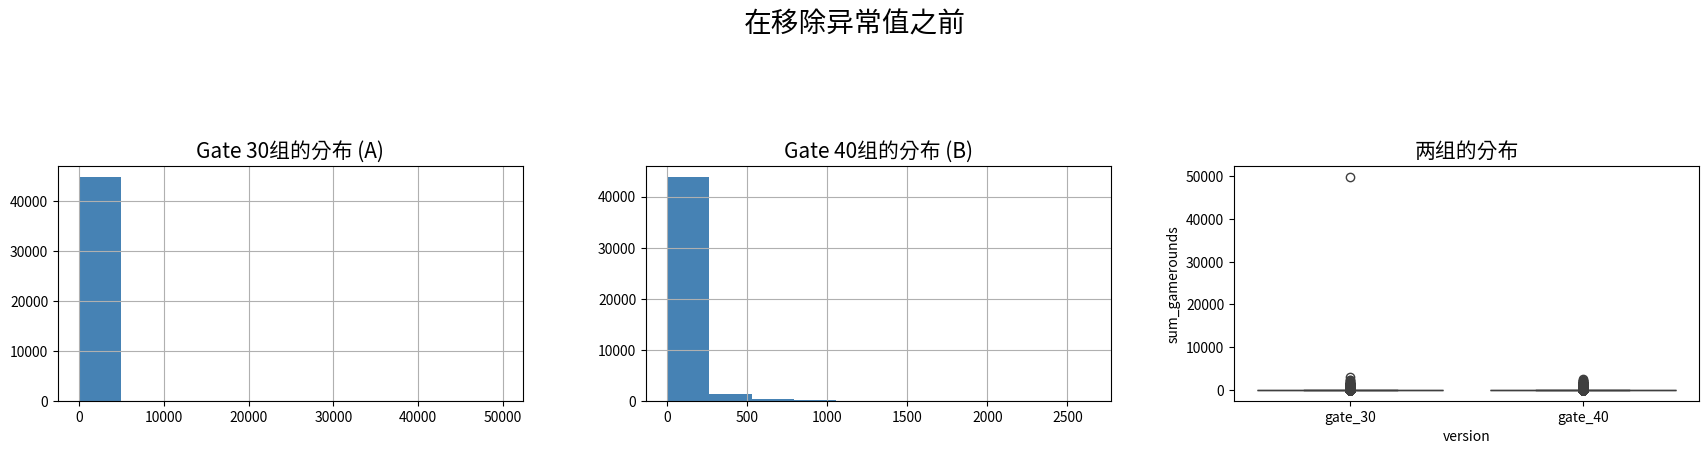

In [11]:
# 创建一个包含3个子图的图形对象
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 绘制Gate 30组的游戏轮数分布直方图
ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax=axes[0], color="steelblue")

# 绘制Gate 40组的游戏轮数分布直方图
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax=axes[1], color="steelblue")

# 绘制箱线图，比较两组的游戏轮数分布
sns.boxplot(x=ab.version, y=ab.sum_gamerounds, ax=axes[2])

# 设置总标题和子图标题
plt.suptitle("在移除异常值之前", fontsize=20)
axes[0].set_title("Gate 30组的分布 (A)", fontsize=15)
axes[1].set_title("Gate 40组的分布 (B)", fontsize=15)
axes[2].set_title("两组的分布", fontsize=15)

# 调整布局
plt.tight_layout(pad=4)

In [12]:
# Calculating 1-day and 7-days retention for each A/B group
df_retention_ab = ab.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44700,0.4482,0.1902,2344795
gate_40,45489,0.4423,0.1820,2333530


Text(0.5, 1.0, 'Before Removing The Extreme Value')

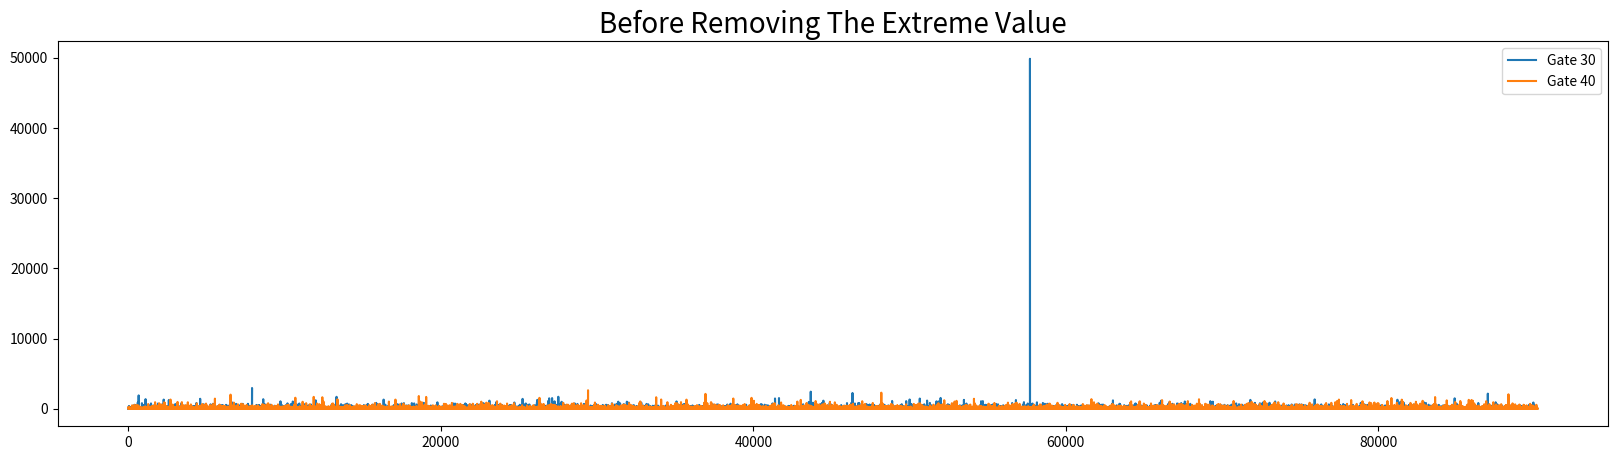

In [13]:
# 从数据集中选择版本为 "gate_30" 和 "gate_40" 的数据，并绘制游戏轮次的折线图
ab[ab.version == "gate_30"].sum_gamerounds.plot(legend=True, label="Gate 30", figsize=(20, 5))
ab[ab.version == "gate_40"].sum_gamerounds.plot(legend=True, label="Gate 40")

# 设置图形的标题
plt.title("Before Removing The Extreme Value", fontsize=20)

### 4. 异常值处理

In [16]:
# 保留游戏轮次小于最大游戏轮次值的行
ab = ab[ab.sum_gamerounds < ab.sum_gamerounds.max()]

# 计算游戏轮次的总结统计信息
# 选择了一些特定的百分位数进行汇总，并将结果转置以便更易读
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90186.0000,51.2593,101.8616,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,2438.0000


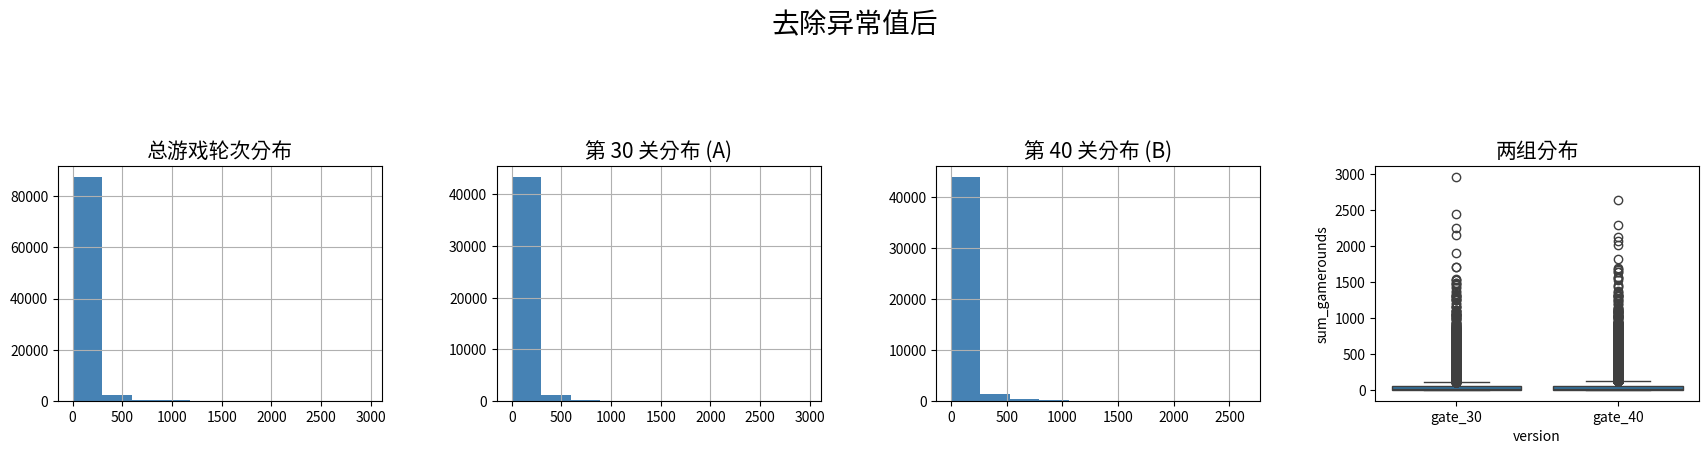

In [ ]:
# 创建包含 1 行 4 列的子图，并设置图形大小为 (18, 5)
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# 绘制总游戏轮次的直方图，并将图形放在第一个子图上
ab.sum_gamerounds.hist(ax=axes[0], color="steelblue")

# 绘制版本为 "gate_30" 的游戏轮次直方图，并将图形放在第二个子图上
ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax=axes[1], color="steelblue")

# 绘制版本为 "gate_40" 的游戏轮次直方图，并将图形放在第三个子图上
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax=axes[2], color="steelblue")

# 绘制版本为 "gate_30" 和 "gate_40" 的游戏轮次箱线图，并将图形放在第四个子图上
sns.boxplot(x=ab.version, y=ab.sum_gamerounds, ax=axes[3])

# 设置总标题
plt.suptitle("去除异常值后", fontsize=20)

# 设置子图标题
axes[0].set_title("总游戏轮次分布", fontsize=15)
axes[1].set_title("第 30 关分布 (A)", fontsize=15)
axes[2].set_title("第 40 关分布 (B)", fontsize=15)
axes[3].set_title("两组分布", fontsize=15)

# 调整子图之间的间距
plt.tight_layout(pad=4)


Text(0.5, 0.98, '去除异常值后')

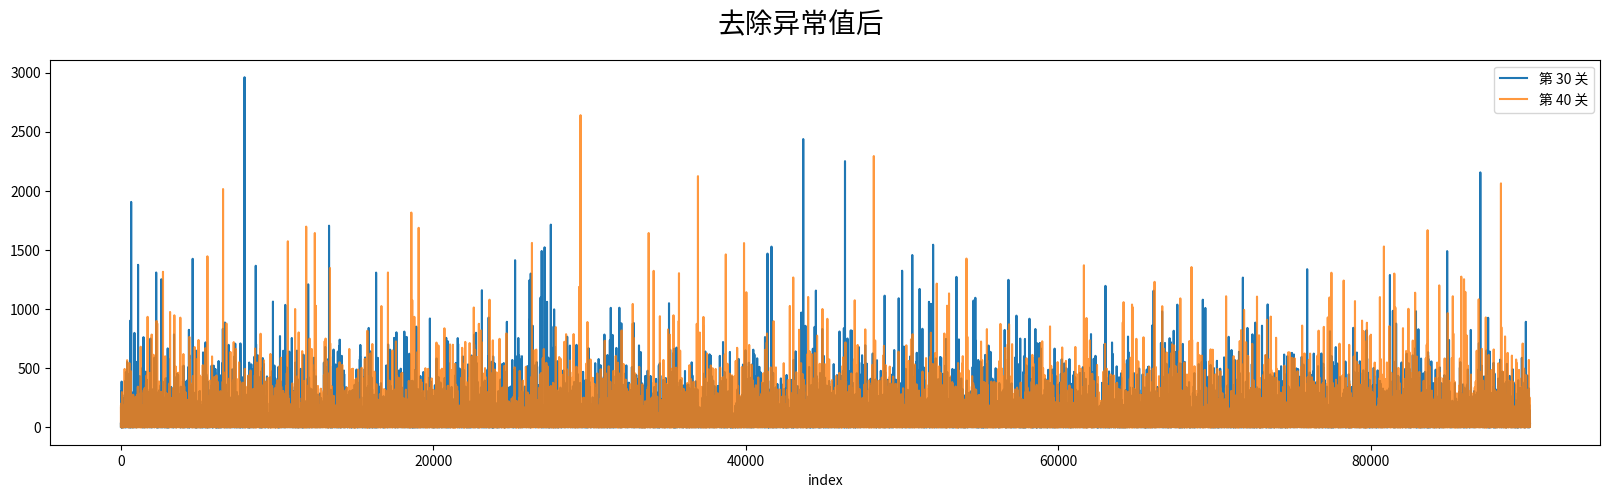

In [ ]:
# 绘制版本为 "gate_30" 的游戏轮次折线图，重置索引并将 "index" 列设置为新的索引，设置图例和标签为 "Gate 30"，图形大小为 (20, 5)
ab[(ab.version == "gate_30")].reset_index().set_index("index").sum_gamerounds.plot(legend=True, label="第 30 关", figsize=(20, 5))

# 绘制版本为 "gate_40" 的游戏轮次折线图，重置索引并将 "index" 列设置为新的索引，设置图例和标签为 "Gate 40"，透明度为 0.8
ab[ab.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend=True, label="第 40 关", alpha=0.8)

# 设置总标题
plt.suptitle("去除异常值后", fontsize=20)


### 5. 数据洞察

**用户安装了游戏，但有3994名用户从未玩过这个游戏！** 造成这种情况的一些原因可能有：

- 他们没有空闲时间来玩游戏
- 用户可能更喜欢玩其他游戏，或者他们已经在玩其他游戏了
- 一些用户可能不喜欢这个应用等等
- 你也可以在下面评论这些用户

**随着关卡的进展，用户数量逐渐减少**

- 大多数用户在游戏的早期阶段就开始玩游戏了，但他们没有进展。
- Tactile Entertainment 应该了解为什么用户在玩游戏时流失。
- 进行研究并收集关于游戏和用户的数据将有助于理解用户流失
- 游戏的难度可以衡量
- 礼物可能有助于玩家的留存


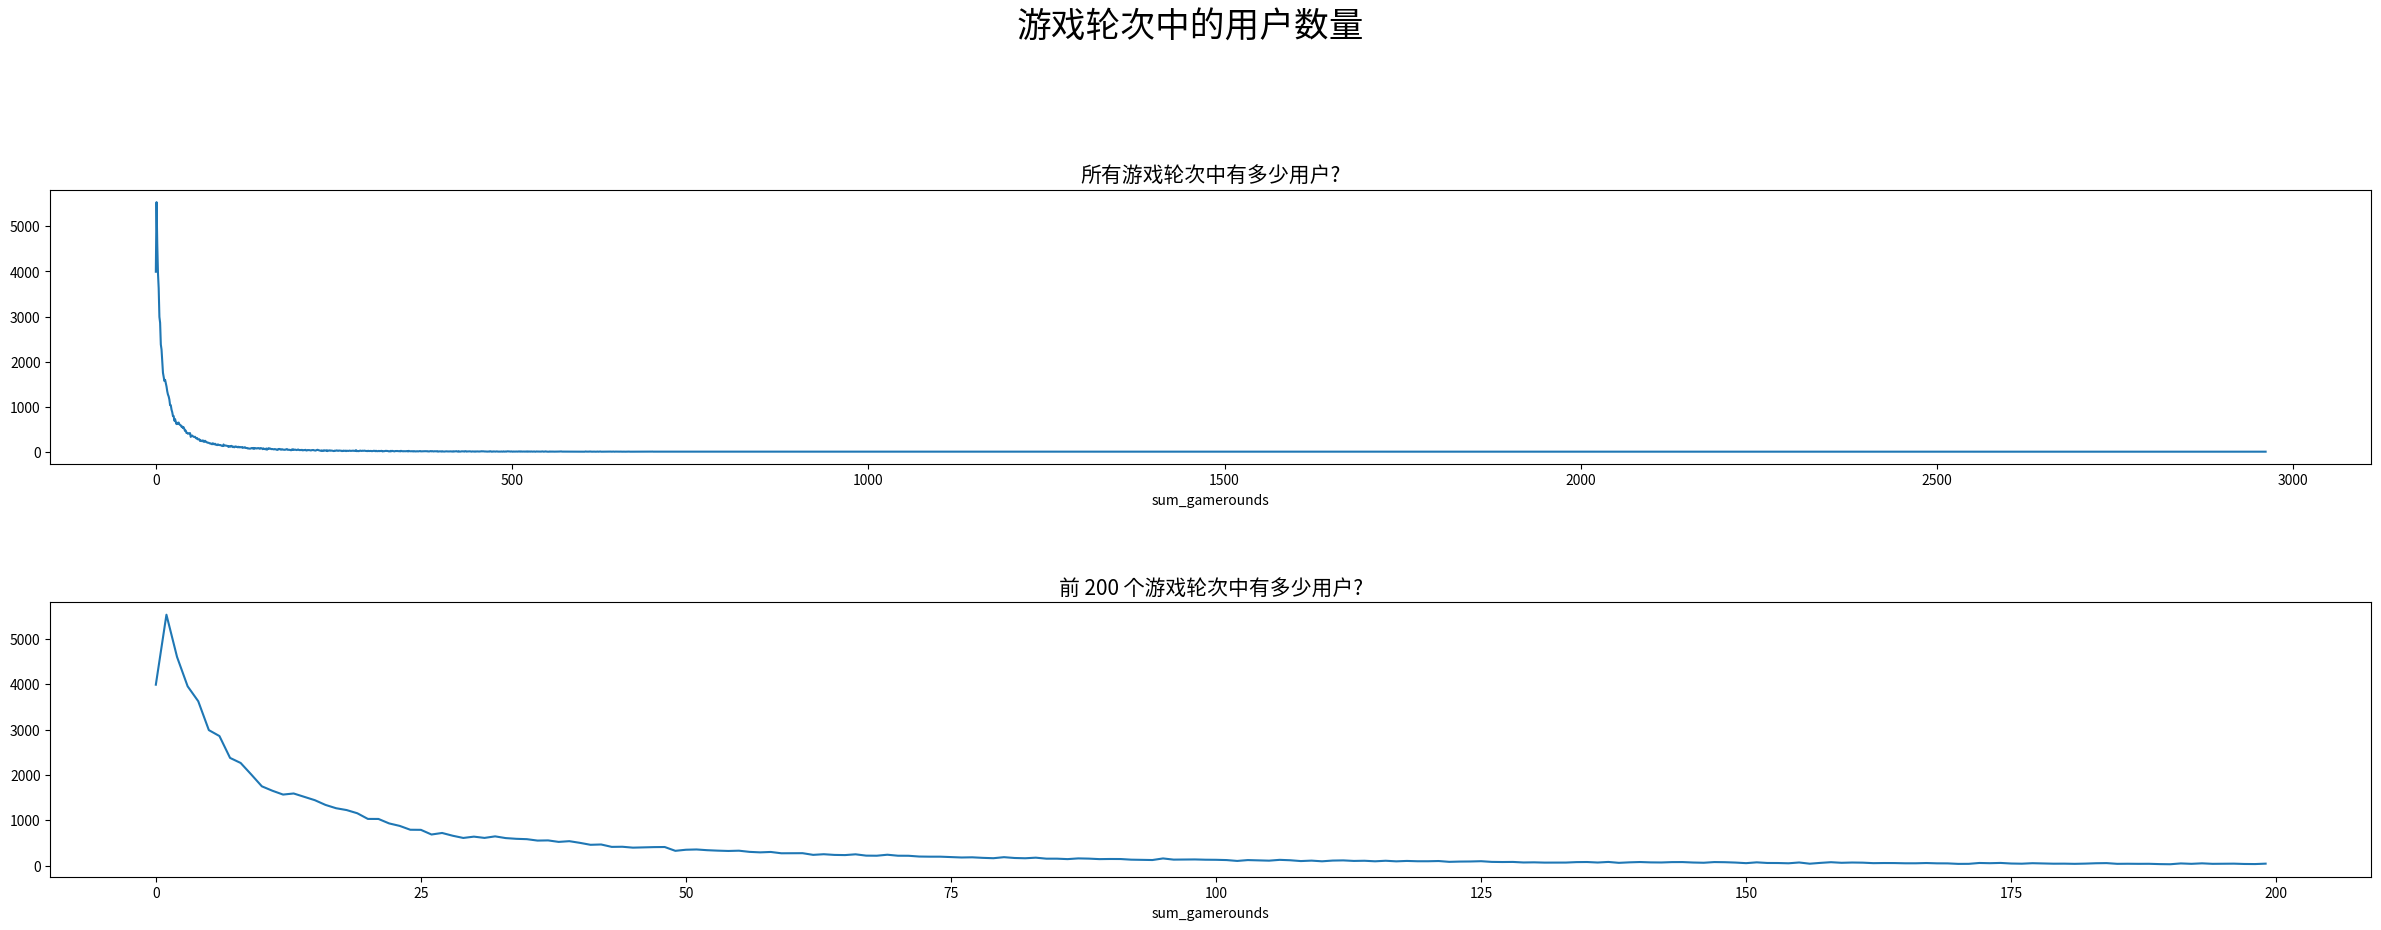

In [ ]:
# 创建包含 2 行 1 列的子图，并设置图形大小为 (25, 10)
fig, axes = plt.subplots(2, 1, figsize=(25, 10))

# 按游戏轮次分组，计算每个游戏轮次的用户数量，并绘制折线图，放在第一个子图上
ab.groupby("sum_gamerounds").userid.count().plot(ax=axes[0])

# 按游戏轮次分组，计算前 200 个游戏轮次的用户数量，并绘制折线图，放在第二个子图上
ab.groupby("sum_gamerounds").userid.count()[:200].plot(ax=axes[1])

# 设置总标题
plt.suptitle("游戏轮次中的用户数量", fontsize=25)

# 设置子图标题
axes[0].set_title("所有游戏轮次中有多少用户?", fontsize=15)
axes[1].set_title("前 200 个游戏轮次中有多少用户?", fontsize=15)

# 调整子图之间的间距
plt.tight_layout(pad=5)


In [ ]:
ab.groupby("sum_gamerounds")['userid'].count().reset_index(name = 'user_cnt').head(20)
# 前 20 个游戏轮次对应的用户数量。

,sum_gamerounds,user_cnt
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


In [17]:
# 得到达到第 30 关和第 40 关水平的用户数量
ab.groupby("sum_gamerounds").userid.count().loc[[30,40]]

,userid
sum_gamerounds,
30,642
40,505


查看总结统计数据，控制组和测试组似乎相似，但这两组在统计上是否显著不同？我们将通过统计方法进行调查。

In [18]:
# A/B Groups & Target Summary Stats
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44698,17.0000,51.2770,101.1265,2438
gate_40,45488,16.0000,51.2419,102.5799,2294


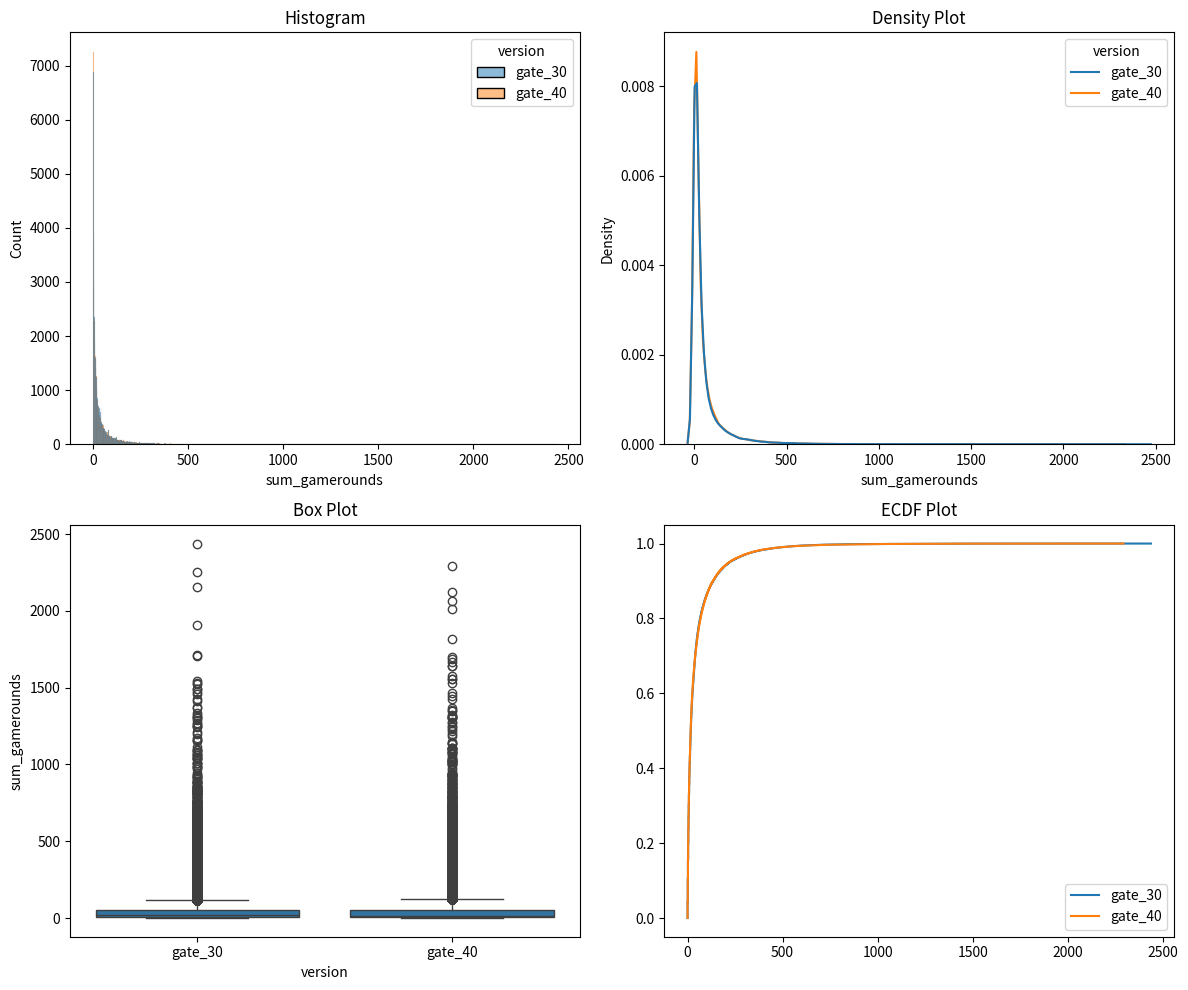

In [19]:
# 创建一个2x2的子图
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 直方图
sns.histplot(data=ab, x='sum_gamerounds', hue='version', kde=False, ax=axs[0, 0])
axs[0, 0].set_title('Histogram')

# 密度图
sns.kdeplot(data=ab, x='sum_gamerounds', hue='version', ax=axs[0, 1])
axs[0, 1].set_title('Density Plot')

# 盒图
sns.boxplot(data=ab, x='version', y='sum_gamerounds', ax=axs[1, 0])
axs[1, 0].set_title('Box Plot')

# ECDF图
def ecdf(data):
    x = sorted(data)
    y = [i / len(x) for i in range(1, len(x) + 1)]
    return x, y

version_1_data = ab[ab['version'] == 'gate_30']['sum_gamerounds']
version_2_data = ab[ab['version'] == 'gate_40']['sum_gamerounds']

x_v1, y_v1 = ecdf(version_1_data)
x_v2, y_v2 = ecdf(version_2_data)

axs[1, 1].plot(x_v1, y_v1, label='gate_30')
axs[1, 1].plot(x_v2, y_v2, label='gate_40')
axs[1, 1].set_title('ECDF Plot')
axs[1, 1].legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


**留存变量为我们提供了玩家留存的详细信息。**

- `retention_1` - 玩家安装后第1天是否回来玩了？
- `retention_7` - 玩家安装后第7天是否回来玩了？

同时，玩家们倾向于不玩这个游戏！有许多玩家退出了游戏。

- 55% 的玩家在安装后的第1天没有玩游戏
- 81% 的玩家在安装后的第7天没有玩游戏

In [ ]:
# 创建一个包含留存情况统计信息的数据框
pd.DataFrame({
    "RET1_COUNT": ab["retention_1"].value_counts(),  # 计算留存1天的用户数量
    "RET1_RATIO": ab["retention_1"].value_counts() / len(ab),  # 计算留存1天的用户比例
    "RET7_COUNT": ab["retention_7"].value_counts(),  # 计算留存7天的用户数量
    "RET7_RATIO": ab["retention_7"].value_counts() / len(ab)   # 计算留存7天的用户比例
})

,RET1_COUNT,RET1_RATIO,RET7_COUNT,RET7_RATIO
False,50035,0.5548,73408,0.8139
True,40153,0.4452,16780,0.1861


通过版本比较留存变量的summary统计数据，并与总游戏轮次进行比较，我们发现两组之间存在相似之处。然而，更有帮助的是查看是否存在统计上的显著差异。


In [ ]:
ab.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median    mean      std   max
version retention_1                                      
gate_30 False        24665  6.0000 16.3591  36.5284  1072
        True         20034 48.0000 94.4117 135.0377  2961
gate_40 False        25370  6.0000 16.3404  35.9258  1241
        True         20119 49.0000 95.3812 137.8873  2640

In [ ]:
ab.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count   median     mean      std   max
version retention_7                                        
gate_30 False        36198  11.0000  25.7965  43.3162   981
        True          8501 105.0000 160.1175 179.3586  2961
gate_40 False        37210  11.0000  25.8564  44.4061  2640
        True          8279 111.0000 165.6498 183.7925  2294

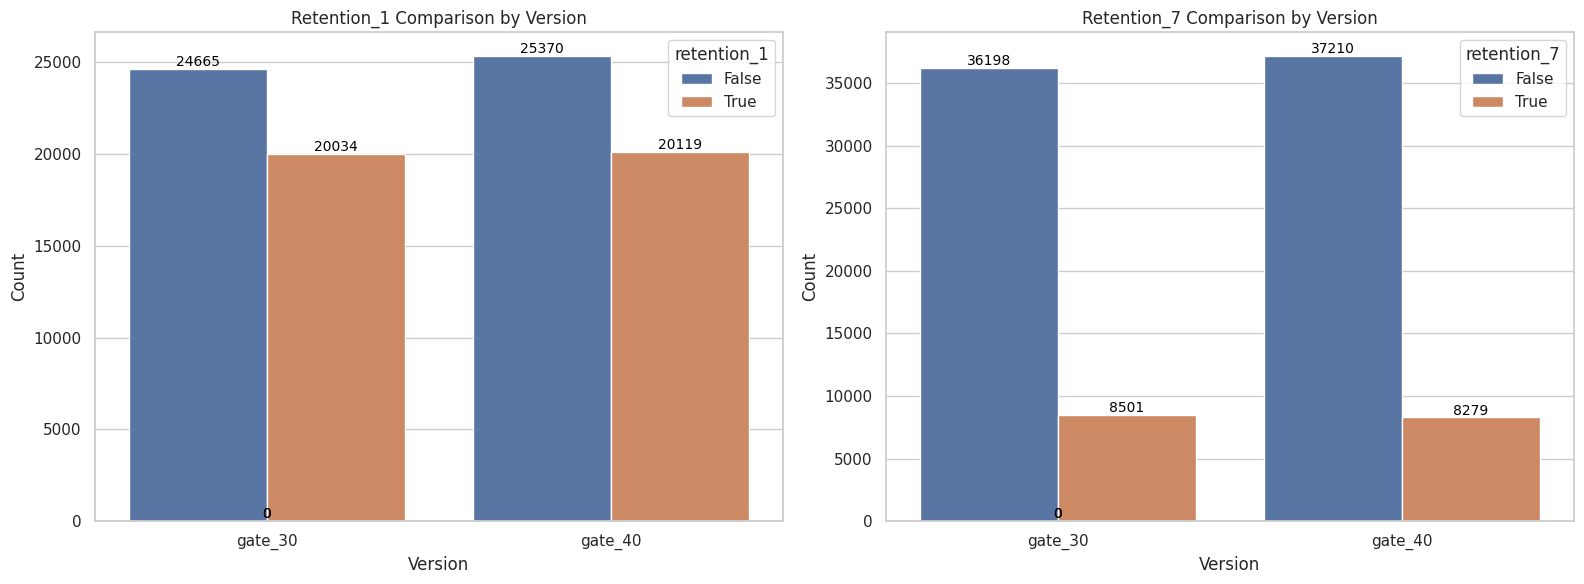

In [ ]:
# 使用groupby计算不同版本和留存情况下的统计数据
stats1 = ab.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

# 使用Seaborn绘制堆叠条形图
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# 第一个子图：Retention_1 Comparison by Version
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=stats1, x='version', y='count', hue='retention_1')
plt.title('Retention_1 Comparison by Version')
plt.xlabel('Version')
plt.ylabel('Count')

# 标注具体数值
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# 使用groupby计算不同版本和留存情况下的统计数据
stats7 = ab.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

# 第二个子图：Retention_7 Comparison by Version
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=stats7, x='version', y='count', hue='retention_7')
plt.title('Retention_7 Comparison by Version')
plt.xlabel('Version')
plt.ylabel('Count')

# 标注具体数值
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

在安装游戏后第1天和第7天来玩游戏的用户数量上，观察到了类似的结果。在总用户中，大约有12,000名用户在安装游戏后的第1天和第7天都玩了游戏。


In [ ]:
ab["Retention"] = np.where((ab.retention_1 == True) & (ab.retention_7 == True), 1,0)
ab.groupby(["version", "Retention"])["sum_gamerounds"].agg(["count", "median", "mean", "std", "max"])

count   median     mean      std   max
version Retention                                        
gate_30 0          38023  12.0000  28.0703  48.0175  1072
        1           6676 127.0000 183.8863 189.6264  2961
gate_40 0          38983  12.0000  28.1034  48.9278  2640
        1           6506 133.0000 190.2824 194.2201  2294

当将留存变量合并并比较两组时，总结统计数据也是相似的。


In [ ]:
ab["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), ab.retention_1, ab.retention_7))
ab.groupby(["NewRetention","version"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,NewRetention,version,count,median,mean,std,max
0,False-False,gate_30,22840,6.0000,11.8197,21.6426,981
1,False-False,gate_40,23597,6.0000,11.9133,20.9010,547
2,False-True,gate_30,1825,43.0000,73.1693,93.2223,1072
3,False-True,gate_40,1773,47.0000,75.2611,94.4780,1241
4,True-False,gate_30,13358,33.0000,49.6945,58.1254,918
5,True-False,gate_40,13613,32.0000,50.0255,60.9246,2640
6,True-True,gate_30,6676,127.0000,183.8863,189.6264,2961
7,True-True,gate_40,6506,133.0000,190.2824,194.2201,2294


这段代码做了以下几件事情：

1. 创建了一个新的列 "NewRetention"，该列的值由 "retention_1" 和 "retention_7" 两列的值组成，以字符串形式表示，中间用 "-" 连接。
2. 使用 `groupby` 函数，按照 "version" 和 "NewRetention" 两列对数据进行分组。
3. 对分组后的数据使用 `agg` 函数进行聚合，计算了每个组中 "sum_gamerounds" 列的数量、中位数、均值、标准差和最大值。
4. 最后通过 `reset_index()` 将分组后的结果重新设置索引，以便得到一个新的数据框。

整体来说，这段代码的目的是根据不同版本和不同留存情况计算游戏轮数的各种统计信息。

### 6. A/B实验（关于数值型指标）


In [ ]:
# 重新定义 A/B 组
# 如果 "version" 列的值是 "gate_30"，则将其替换为 "A"，否则替换为 "B"
ab["version"] = np.where(ab.version == "gate_30", "A", "B")

# 展示修改后的数据框前几行以验证结果
ab.head()


,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True


#### 实验步骤

假设：

- 检查正态性
- 如果符合正态分布，检查齐性

步骤：

- 分割和定义控制组与测试组
- 应用 Shapiro 检验检查正态性
- 如果参数满足，应用 Levene 检验检查方差齐性
- 如果参数满足且方差齐性，应用 T-检验
- 如果参数满足但方差不齐，应用 Welch 检验
- 如果不符合参数要求，直接应用 Mann-Whitney U 检验

![90d024be0e92d1a2f68c6042bafadc47.jpeg](https://i.mji.rip/2024/05/08/90d024be0e92d1a2f68c6042bafadc47.jpeg)


#### 注意事项

<font color = red>注意点：</font>
1. 测试时长：测试的时长不宜过短，否则参与试验的用户几乎都是产品的高频用户。

2. 分流（或者说抽样）：应该保证同时性、同质性、唯一性、均匀性。

①同时性：分流应该是同时的，测试的进行也应该是同时的。

②同质性：也可以说是相似性，是要求分出的用户群，在各维度的特征都相似。可以基于用户的设备特征（例如手机机型、操作系统版本号、手机语言等）和用户的其他标签（例如性别、年龄、新老用户、会员等级等）进行分群，每一个A/B测试试验都可以选定特定的用户群进行试验。

思考：如何判断是不是真的同质？可以采用AAB测试。抽出两份流量进行A版本的测试，进行AA测试，并分别与B版本进行AB测试。通过考察A1和A2组是否存在显著性差异，就可以确定试验的分流是否同质了。

③唯一性：即要求用户不被重复计入测试。

④均匀性：要求各组流量是均匀的。Hash算法。现在一般由专用的A/B测试工具负责。也有看到一篇文章写了python实现，大体的思路是对用户id添加Salt值，对其散列，并据此算出一个0-1之间的浮点数，同设定好的阈值比大小，从而分组。有兴趣的可以看看，该作者的思路很清晰： 随机分配里的Why and How。（统计学原理上，我没有找到均匀性这一要求的依据，其实双样本的假设检验并不要求两个样本的数量相等或相近。当然从直观上是可以理解，希望分出的用户组越相近越好，包括人数的相近。）

#### 为什么判断是不是正态？

判断数据是否符合正态分布是因为很多统计方法（如t检验）在数据符合正态分布时具有更高的准确性和可靠性。正态性检验是为了确认所采用的统计方法是否适用于数据，以避免在假设检验中得出错误的结论。

如果数据符合正态分布，那么可以使用参数统计方法（如t检验）进行假设检验，这样可以更准确地估计总体参数（如总体均值）的差异。而如果数据不符合正态分布，使用参数统计方法可能会导致偏差或错误的结论。

在A/B测试中，我们通常希望使用正态性检验来验证我们所采用的统计方法是否适用于数据，以确保我们得出的结论是可靠和准确的。如果数据不符合正态分布，我们可以选择使用非参数统计方法（如Mann-Whitney U检验）来进行假设检验，这些方法对数据的分布情况不做任何假设，因此更加灵活和适用于不同类型的数据。



#### 不是正态怎么办？

可以考虑使用非参数统计方法进行假设检验，这样可以避免假设数据符合正态分布的前提。非参数统计方法不依赖于数据的分布情况，因此更加灵活和适用于不同类型的数据。

常用的非参数统计方法包括：

1. Mann-Whitney U检验：用于比较两个独立样本的中位数差异。（一般用这个）
2. Wilcoxon符号秩检验：用于比较两个相关样本的中位数差异。
3. Kruskal-Wallis检验：用于比较多个独立样本的中位数差异。
4. Friedmann检验：用于比较多个相关样本的中位数差异。

#### 为什么要进行方差齐性检验？

确保在进行独立双样本t检验等参数统计方法时，所采用的假设检验结果的可靠性和准确性。方差齐性检验用于检验两个或多个组的样本方差是否相等，即各组数据的方差是否相似。如果各组数据的方差相似，则称为方差齐性。

如果数据符合正态分布且方差齐性检验通过，则使用独立双样本t检验（ttest_ind函数）进行参数检验，以检验两组之间的均值差异。如果数据不符合正态分布或方差齐性检验未通过，则使用Mann-Whitney U检验（mannwhitneyu函数）进行非参数检验。

#### 非参方法检验


|            | 非参数检验                                                   | 参数检验                                                     |
| ---------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| 总体分布   | 总体分布未知，或非正态分布                                   | 总体呈正态分布                                               |
| 方差相等   | 无                                                           | 涉及两个及以上的总体                                         |
| 变量类型   | 定序/定序，非正态分布的定距变量                              | 定距/定比变量                                                |
| 统计检验力 | 较高                                                         | 较高                                                         |
| 优势       | 1. 使用条件松宽，更实用，适用于多种变量定量分析，计算简单，应用范围更广；<br>2. 数据观测无法满足参数检验的数据假设时，可采用非参数检验方法。 | 1. 统计检验效度较高，能更加准确地测量变量差异和相关关系；<br>2. 比非参数检验更有统计效度，即使总体分布特征不明确时，也能进行参数检验。 |
| 劣势       | 1. 统计检验效度的效力大大低于参数检验；<br>2. 假设条件较宽松，前提条件假设不明确导致某些参数差异和关系观测结果误差较大。 | 1. 要求变量符合正态分布，应用范围较窄；<br>2. 变量观测要满足正态分布假设，观测效果和适用性受限。 |

非参方法适用场景：
1. 指标稀疏；
2. 存在极端值；
3. 明显不符合正态分布。


In [ ]:
# ab = ab[ab['sum_gamerounds']<=300]
# ab['sum_gamerounds'].quantile(0.01,0.99)

# A/B 测试假设
H0: A == B
H1: A != B 

是否满足正态性假设？
A组: False, B组: False

是否满足方差齐性假设: True 



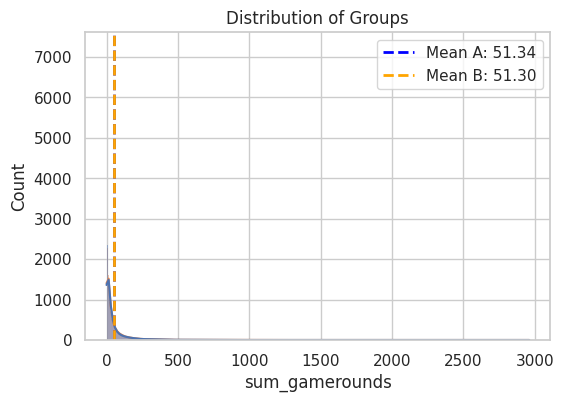

,Test Type,target,Homogeneity,AB Hypothesis,p-value,Mean Difference,Effect Size,Observed Power,Comment
0,Non-Parametric,sum_gamerounds,Yes,Fail to Reject H0,0.0509,-0.0433,-0.0004,0.0505,A/B 组相似！


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, levene
import statsmodels.stats.api as sms

def AB_Test(dataframe, group, target, alpha=0.05, visualize=True):
    # 拆分 A/B 组
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]

    # 假设检验：正态性
    ntA = shapiro(groupA)[1] < alpha
    ntB = shapiro(groupB)[1] < alpha

    # 参数检验
    leveneTest = levene(groupA, groupB)[1] < alpha

    if (ntA == False) & (ntB == False): # 正态分布
        # 方差齐性
        if leveneTest == False:
            ttest, p_value = ttest_ind(groupA, groupB, equal_var=True)
            test_type = "Parametric (Equal Variance)"
        else:
            ttest, p_value = ttest_ind(groupA, groupB, equal_var=False)
            test_type = "Parametric (Unequal Variance)"
    else:
        # 非参数检验
        ttest, p_value = mannwhitneyu(groupA, groupB, alternative='two-sided')
        test_type = "Non-Parametric"

    # 计算均值差异
    mean_diff = groupB.mean() - groupA.mean()

    # 计算效应大小
    nobs_A = len(groupA)
    nobs_B = len(groupB)
    pooled_std = np.sqrt(((nobs_A-1)*groupA.var() + (nobs_B-1)*groupB.var()) / (nobs_A + nobs_B - 2))
    effect_size = mean_diff / pooled_std

    # 计算观察到的功效
    observed_power = sms.tt_ind_solve_power(effect_size=effect_size, nobs1=nobs_A, alpha=alpha, alternative='two-sided')

    # 结果
    ab_hypothesis = p_value < alpha
    comment = "A/B 组无明显差异！" if not ab_hypothesis else "A/B 组有明显差异！"

    result = pd.DataFrame({
        "Test Type": [test_type],
        "target": [target],
        "Homogeneity": ["Yes" if not leveneTest else "No"],
        "AB Hypothesis": ["Reject H0" if ab_hypothesis else "Fail to Reject H0"],
        "p-value": [p_value],
        "Mean Difference": [mean_diff],
        "Effect Size": [effect_size],
        "Observed Power": [observed_power],
        "Comment": [comment],
        "t-stats": [ttest]
    })

    # 打印假设
    print("# A/B 测试假设")
    print("H0: A == B")
    print("H1: A != B", "\n")

    # 打印是否满足正态性和方差齐性假设
    print(f"是否满足正态性假设？\nA组: {not ntA}, B组: {not ntB}\n")
    print(f"是否满足方差齐性假设: {not leveneTest}", "\n")

    # 可视化
    if visualize:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=dataframe, x=target, hue=group, kde=True)
        plt.axvline(groupA.mean(), color='blue', linestyle='dashed', linewidth=2, label=f'Mean A: {groupA.mean():.2f}')
        plt.axvline(groupB.mean(), color='orange', linestyle='dashed', linewidth=2, label=f'Mean B: {groupB.mean():.2f}')
        plt.title('Distribution of Groups')
        plt.legend()
        plt.show()

    return result

# 应用 A/B 测试
result = AB_Test(dataframe=ab, group="version", target="sum_gamerounds")

result


如果我们的target不是sum_gamerounds，而是留存呢？


从数值型指标变为比率型指标

### 7. A/B实验（关于0-1指标）

该类型指标比如留存率 = 留存的用户数/今日总用户数，比如冷启动通过率 = 三天内达到 20 个convert的计划数/总新增计划数，这类指标相当于构造了一个 0-1 变量，进而对 0-1 变量进行 T 检验。


比例类（Proportion）指标比如UV转化率、次日留存率等，一般是“某条件下用户去重计数 / 用户去重计数”，使用的是两总体比例的T检验。比如对于单个用户的留存行为，结果只有两种：要么发生，要么不发生。

n次试验中成功次数的概率满足二项分布。

当样本容量n很大时候，样本比率的抽样分布近似服从正态分布，因此我们可以使用Z检验来检验两个总体比例相等的假设是否成立。


$$
z=\frac{{p_1} - {p_2}}{\sqrt{({p}(1-{p})(\frac{1}{n_1}+\frac{1}{n_2})}}
$$

- $ p_1 $ 和 $ p_2 $ 分别是两个样本的比例（或者概率），比如 A 组和 B 组的l留存率。
- $ n_1 $ 和 $ n_2 $ 是对应样本的大小，即样本中观察的总数。
- $ p $ 是合并样本的比例，即 $ p = \frac{n_1 p_1 + n_2 p_2}{n_1 + n_2} $ （加权平均）。
- $ 1 - p $ 是合并样本的另一组比例，即 $ 1 - p = 1 - \frac{n_1 p_1 + n_2 p_2}{n_1 + n_2} $。



In [ ]:
df = ab.copy()

In [ ]:
df

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True
...,...,...,...,...,...,...,...
90184,9999441,B,97,True,False,0,True-False
90185,9999479,B,30,False,False,0,False-False
90186,9999710,A,28,True,False,0,True-False
90187,9999768,B,51,True,False,0,True-False


在 Jupyter Notebook 中，可以使用 sqlite3 库来处理 DataFrame 数据。

#### sqlite3处理数据

In [ ]:
import sqlite3

# 创建 SQLite 数据库连接
conn = sqlite3.connect('abtest.db')

# 将 DataFrame 存储到 SQLite 数据库中
df.to_sql('abtest', conn, if_exists='replace', index=False)

# 从 SQLite 数据库中查询数据
query = 'SELECT * FROM abtest'
df_from_db = pd.read_sql(query, conn)

df_from_db

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,0,0,0,False-False
1,337,A,38,1,0,0,True-False
2,377,B,165,1,0,0,True-False
3,483,B,1,0,0,0,False-False
4,488,B,179,1,1,1,True-True
...,...,...,...,...,...,...,...
90183,9999441,B,97,1,0,0,True-False
90184,9999479,B,30,0,0,0,False-False
90185,9999710,A,28,1,0,0,True-False
90186,9999768,B,51,1,0,0,True-False


In [ ]:
query = '''


SELECT
    label,
    version,
    SUM(cnt) as cnts,
    SUM(is_retent) as retent_cnts
FROM (
    SELECT
        'retention_1' as label,
        version,
        userid,
        1 as cnt,
        retention_1 as is_retent
    FROM abtest

    UNION ALL

    SELECT
        'retention_7' as label,
        version,
        userid,
        1 as cnt,
        retention_7 as is_retent
    FROM abtest
) AS subquery
GROUP BY label, version;



'''

rent_res = pd.read_sql(query, conn)
rent_res

,label,version,cnts,retent_cnts
0,retention_1,A,44699,20034
1,retention_1,B,45489,20119
2,retention_7,A,44699,8501
3,retention_7,B,45489,8279


最后取出来的数据是一个四列的表格，每一列从左到右分别为：
1. 指标名称
2. 实验组名
3. 样本量，或者理解成指标的分母大小
4. 命中样本量，或者理解成指标的分子大小（是否留存）


In [ ]:
from statsmodels.stats.proportion import proportions_ztest


# dt 必须是数据框形式，共四列，分别为 metrics、group、population、target，分别代表变量名称、组别、样本量（即留存率的分母）、命中样本量（即留存率的分子）
# base 为基准组，在 group 中选择一个作为基准，其他各组将与该组进行双样本 T 检验
# base 取值方式； base = "该组名字"
def binary_T_test(dt=None, base_group=None):
    # 重命名列名
    dt.columns = ["metrics", "group", "population", "target"]

    # 获取唯一的指标和组别
    metrics_vec = dt['metrics'].unique()   # 获取唯一的指标向量
    group_vec = dt['group'].unique()       # 获取唯一的组名向量


    # metrics	 group population	target
    # retention_1	A	 44699	  20034
    # retention_1	B	 45489	  20119
    # retention_7	A	 44699	  8501
    # retention_7	B	 45489	  8279


    # 创建一个空的DataFrame来存储p值
    p_values = pd.DataFrame(index=metrics_vec, columns=group_vec)

    # 遍历每个指标
    for i, metric in enumerate(metrics_vec):
        # 从数据框中选择当前指标的子集
        sub_tt = dt[dt['metrics'] == metric]

        # 初始化一个数组来存储每个组的p值
        p_value = np.zeros(len(group_vec))

        # 遍历每个组别
        for j, group in enumerate(group_vec):
            # 获取基准组的样本量和命中样本量
            pop0 = sub_tt.loc[sub_tt['group'] == base_group, 'population'].values[0]
            tar0 = sub_tt.loc[sub_tt['group'] == base_group, 'target'].values[0]

            # 获取当前组的样本量和命中样本量
            pop1 = sub_tt.loc[sub_tt['group'] == group, 'population'].values[0]
            tar1 = sub_tt.loc[sub_tt['group'] == group, 'target'].values[0]

            # 将样本量和命中样本量转换为数组形式
            count = np.array([tar0, tar1])
            nobs = np.array([pop0, pop1])

            # 执行两个比例的Z检验
            _, p_value[j] = proportions_ztest(count, nobs, alternative='two-sided')

        # 将得到的p值存储到p_values DataFrame中
        p_values.loc[metric, :] = p_value

    # 将结果以字典形式返回
    results = {'P_values': p_values}
    return results


# Call the function with Python DataFrame and base group name
results = binary_T_test(dt=rent_res, base_group="A")
print(results['P_values'])


                 A      B
retention_1 1.0000 0.0739
retention_7 1.0000 0.0016


In [ ]:
# 计算对照组和实验组的留存率
retention_1_A = df[df['version'] == 'A']['retention_1'].mean()
retention_1_B = df[df['version'] == 'B']['retention_1'].mean()

retention_7_A = df[df['version'] == 'A']['retention_7'].mean()
retention_7_B = df[df['version'] == 'B']['retention_7'].mean()

# 计算留存率的差异（Delta）
delta_1 = retention_1_B - retention_1_A
delta_7 = retention_7_B - retention_7_A

# 计算p1 p2 p等指标
n_A = df[df['version'] == 'A'].shape[0]
n_B = df[df['version'] == 'B'].shape[0]

retention_1_p1 = retention_1_A
retention_1_p2 = retention_1_B

retention_1_p = (retention_1_p1*n_A + retention_1_p2*n_B)/(n_A+n_B)

retention_7_p1 = retention_7_A
retention_7_p2 = retention_7_B

retention_7_p = (retention_7_p1*n_A + retention_7_p2*n_B)/(n_A+n_B)


se_1 = np.sqrt((retention_1_p*(1-retention_1_p) / n_A) + (retention_1_p*(1-retention_1_p) / n_B))
se_7 = np.sqrt((retention_7_p*(1-retention_7_p) / n_A) + (retention_7_p*(1-retention_7_p) / n_B))

# 计算 z 值
z_1 = delta_1 / se_1
z_7 = delta_7 / se_7

# 计算 p 值
p_1 = stats.norm.sf(abs(z_1)) * 2  # 双尾检验
p_7 = stats.norm.sf(abs(z_7)) * 2  # 双尾检验

print(f"Retention 1-day: Delta = {delta_1}, SE = {se_1}, z = {z_1}, p = {p_1}")
print(f"Retention 7-day: Delta = {delta_7}, SE = {se_7}, z = {z_7}, p = {p_7}")

# 判断显著性
alpha = 0.05
if p_1 < alpha:
    print("Retention 1-day difference is significant.")
else:
    print("Retention 1-day difference is not significant.")

if p_7 < alpha:
    print("Retention 7-day difference is significant.")
else:
    print("Retention 7-day difference is not significant.")

Retention 1-day: Delta = -0.005915196587034155, SE = 0.0033099350735518005, z = -1.787103509763628, p = 0.0739207603418346
Retention 7-day: Delta = -0.00818318160884296, SE = 0.0025917386041911824, z = -3.1574100858819936, p = 0.0015917731773993442
Retention 1-day difference is not significant.
Retention 7-day difference is significant.


#### Bootstrapping

> **Definiton of Method:** We'll use bootstrapping for A/B testing. The basic idea of bootstrapping is that inference about a population from sample data (sample → population) can be modelled by resampling the sample data and performing inference about a sample from resampled data (resampled → sample). As the population is unknown, the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is in fact the sample, and this is known; hence the quality of inference of the 'true' sample from resampled data (resampled → sample) is measurable.

1. **样本数据**：首先，我们有一个原始的样本数据，通常是我们观察到的实际数据，比如 Cookie Cats 游戏中两组玩家的留存率数据。
2. **重采样**：通过重复地从原始样本中随机抽取数据来创建多个重采样样本。这些重采样样本与原始样本的大小相同，但可能由于随机性而有所不同。
3. **推断统计量**：对每个重采样样本，计算我们感兴趣的统计量，比如留存率的差异（Delta），或者其他需要的指标。
4. **评估推断质量**：通过观察不同重采样样本得到的统计量分布，评估我们对样本数据的推断质量。这使得我们可以量化我们对样本统计量的推断是否准确或可信。

优势在于，它不需要对总体分布做出假设，而是直接利用样本数据来推断样本统计量的性质

具体步骤：

1. **创建500个数据集样本（自助法）**：
   - 使用自助法从原始数据中创建500个重采样样本。每个样本应该包括与原始数据集相同数量的观察值。
2. **计算A/B组的1天和7天留存率**：
   - 对于每个重采样样本，计算移动第一关关卡到第30关和第40关后，A组和B组的1天和7天留存率。
3. **绘制自助法分布图**：
   - 对于每个留存率（1天和7天），绘制A组和B组的自助法分布图。这些图表可以帮助可视化留存率在不同关卡设置下的分布情况。
4. **计算A/B组的留存率差异**：
   - 计算移动关卡后，A组和B组的留存率差异。这可以通过比较两组重采样样本的平均值或中位数来实现。
5. **计算1天和7天留存率在第30关更高的概率**：
   - 确定1天和7天留存率在第30关设置时高于第40关设置的概率。这可以通过计算两个分布下特定留存率的概率来实现。
6. **评估结果并提出建议**：
   - 根据分析结果和计算的概率，评估移动第一关关卡的效果，并为决策提供建议。这可能涉及推荐是否应该保留新设置或回滚到旧设置。

In [ ]:
iterations = 500

bootstrap_df = pd.DataFrame()
p_values = []

df = ab.copy()
for x in tqdm(range(iterations)):
    iter_df = df.sample(frac = 1, replace=True).groupby(['version'], as_index=False).agg(
        retention_1 = ('retention_1', np.mean),
        retention_7 = ('retention_7', np.mean)
    )

    # control and variant data frames
    control_iter_df = iter_df[iter_df['version'] == 'A'].reset_index()
    variant_iter_df = iter_df[iter_df['version'] == 'B'].reset_index()

    bootstrap_df = pd.concat([bootstrap_df, iter_df])

100%|██████████| 500/500 [00:15<00:00, 33.06it/s]


In [ ]:
# bootstrapped data frame
bootstrap_df.head()

,version,retention_1,retention_7
0,A,0.4490,0.1890
1,B,0.4435,0.1827
0,A,0.4466,0.1913
1,B,0.4445,0.1807
0,A,0.4464,0.1892


In [ ]:
# transpose data frame
bootstrap_df_melt = pd.melt(bootstrap_df, id_vars = 'version', value_vars = ['retention_1', 'retention_7'], var_name = 'ratio_metric')
bootstrap_df_melt.head()

,version,ratio_metric,value
0,A,retention_1,0.4490
1,B,retention_1,0.4435
2,A,retention_1,0.4466
3,B,retention_1,0.4445
4,A,retention_1,0.4464


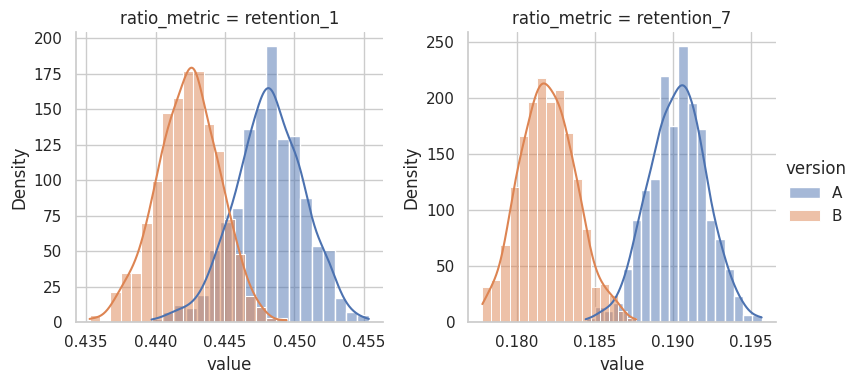

In [ ]:
# plot bootstrap distributions
plot = sns.FacetGrid(bootstrap_df_melt, col="ratio_metric", sharex = False, sharey = False, height = 4, hue = 'version')
plot.map_dataframe(sns.histplot, x="value", kde = True, stat = 'density', common_bins = True, fill = True)
plot.add_legend()

In [ ]:
bootstrap_control = bootstrap_df[bootstrap_df['version'] == 'A'].reset_index()
bootstrap_variant = bootstrap_df[bootstrap_df['version'] == 'B'].reset_index()

In [ ]:
# calculate KPIs differences
bootstrap_diffs = pd.DataFrame()

bootstrap_diffs['retention_1_diff'] = bootstrap_variant['retention_1'] - bootstrap_control['retention_1']
bootstrap_diffs['retention_7_diff'] = bootstrap_variant['retention_7'] - bootstrap_control['retention_7']

In [ ]:
bootstrap_diffs_melt = pd.melt(bootstrap_diffs, value_vars = ['retention_1_diff', 'retention_7_diff'], var_name = 'ratio_metric')

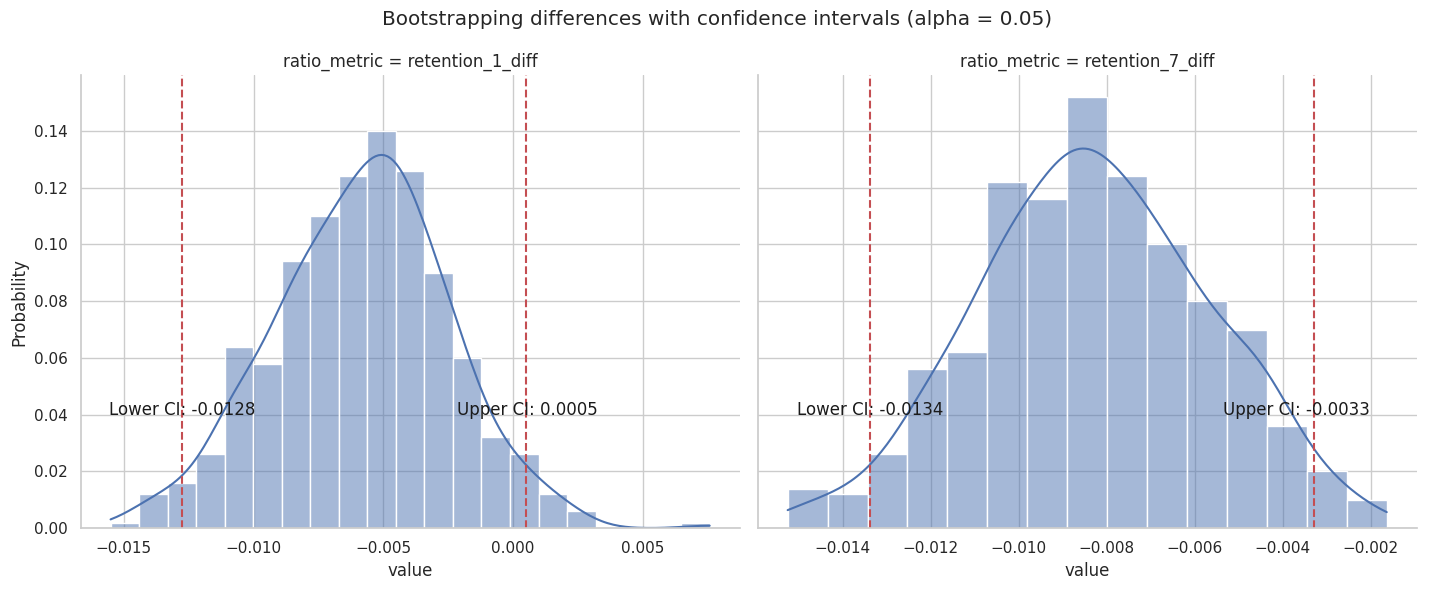

In [ ]:
# Define alpha for confidence intervals
alpha = 0.05
lower_ci = alpha / 2
upper_ci = 1 - (alpha / 2)

# Create a FacetGrid with seaborn
plot = sns.FacetGrid(bootstrap_diffs_melt, col="ratio_metric", sharex=False, height=6, aspect=1.2)
plot.map_dataframe(sns.histplot, x="value", kde=True, stat='probability', common_bins=True, fill=True)
plot.fig.suptitle(f'Bootstrapping differences with confidence intervals (alpha = {alpha})')

# Add confidence intervals lines
plot.map(lambda y, **kw: plt.axvline(y.quantile(lower_ci), color='r', linestyle='--'), 'value')
plot.map(lambda y, **kw: plt.axvline(y.quantile(upper_ci), color='r', linestyle='--'), 'value')

# Add confidence intervals annotations
plot.map(lambda y, **kw: plt.text(y.quantile(lower_ci), 0.04,
                                  f'Lower CI: {round(y.quantile(lower_ci), 4)}', color='k', ha='center'), 'value')
plot.map(lambda y, **kw: plt.text(y.quantile(upper_ci) * 1.125, 0.04,
                                  f'Upper CI: {round(y.quantile(upper_ci), 4)}', color='k', ha='center'), 'value')

# Add legend if needed
plot.add_legend()

# Show the plot
plt.show()

Because 0 falls in confidence interval we can't say there is significant difference between variant groups.
From above graphs we can see that there is a high probability that variant group will be worse. But what is the probability?

In [ ]:
retention_1_prob = (bootstrap_diffs['retention_1_diff'] < 0).mean()
retention_7_prob = (bootstrap_diffs['retention_7_diff'] < 0).mean()

print('Probability that retention_1 in variant group will be worse than retention_1 in control group is', '{:.2%}.'.format(retention_1_prob))
print('Probability that retention_7 in variant group will be worse than retention_7 in control group is', '{:.2%}.'.format(retention_7_prob))

Probability that retention_1 in variant group will be worse than retention_1 in control group is 95.80%.
Probability that retention_7 in variant group will be worse than retention_7 in control group is 100.00%.


100%|██████████| 500/500 [00:31<00:00, 15.71it/s]


Retention 1-day: 95% CI = [-0.012341826834664072, 0.0012002581570176218]
Retention 7-day: 95% CI = [-0.013341852087613501, -0.00276687431111675]


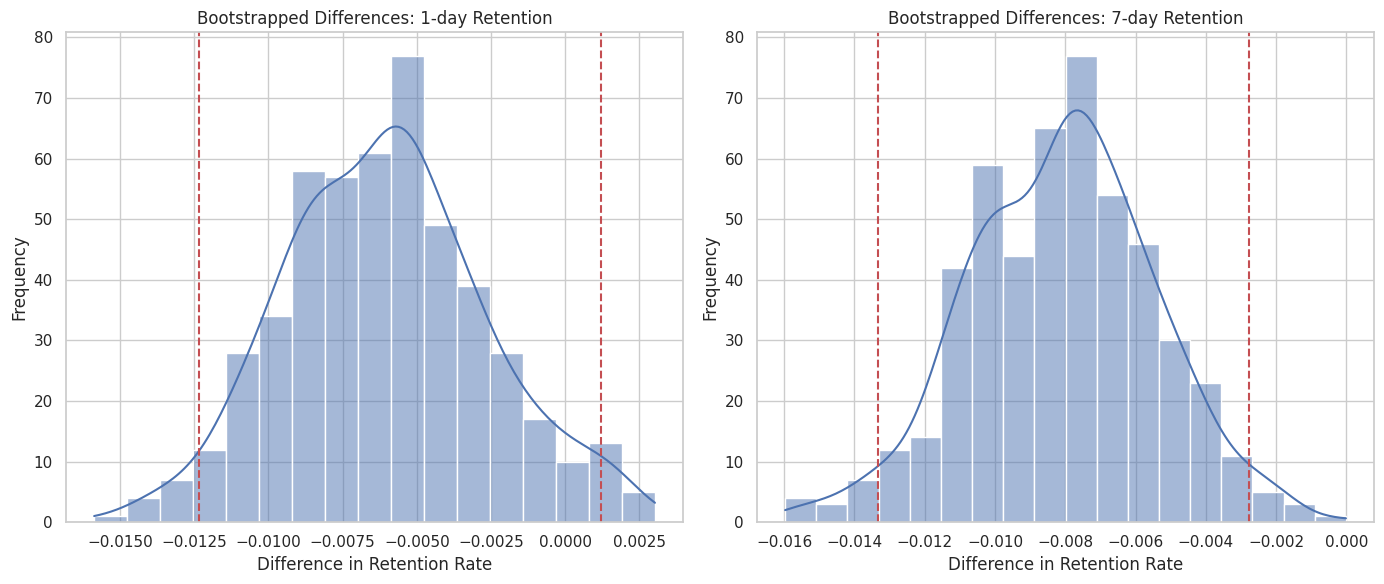

Retention 1-day difference is not significant.
Retention 7-day difference is significant.


In [ ]:
# 初始化存储重采样结果的列表
boot_1d_diffs = []
boot_7d_diffs = []

# 设置重采样次数
n_bootstraps = 500 # 可以改成5000

# 进行重采样
for i in tqdm(range(n_bootstraps)):
    boot_sample = df.sample(frac=1, replace=True)
    retention_1_A = boot_sample[boot_sample['version'] == 'A']['retention_1'].mean()
    retention_1_B = boot_sample[boot_sample['version'] == 'B']['retention_1'].mean()
    retention_7_A = boot_sample[boot_sample['version'] == 'A']['retention_7'].mean()
    retention_7_B = boot_sample[boot_sample['version'] == 'B']['retention_7'].mean()

    boot_1d_diffs.append(retention_1_B - retention_1_A)
    boot_7d_diffs.append(retention_7_B - retention_7_A)

# 将结果转换为 DataFrame
boot_1d_diffs = pd.Series(boot_1d_diffs)
boot_7d_diffs = pd.Series(boot_7d_diffs)

# 计算95%置信区间
alpha = 0.05
ci_lower_1d = boot_1d_diffs.quantile(alpha/2)
ci_upper_1d = boot_1d_diffs.quantile(1 - alpha/2)
ci_lower_7d = boot_7d_diffs.quantile(alpha/2)
ci_upper_7d = boot_7d_diffs.quantile(1 - alpha/2)

# 打印结果
print(f"Retention 1-day: 95% CI = [{ci_lower_1d}, {ci_upper_1d}]")
print(f"Retention 7-day: 95% CI = [{ci_lower_7d}, {ci_upper_7d}]")

# 绘制自助法分布和置信区间
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(boot_1d_diffs, kde=True, ax=ax1)
ax1.axvline(ci_lower_1d, color='r', linestyle='--')
ax1.axvline(ci_upper_1d, color='r', linestyle='--')
ax1.set_title('Bootstrapped Differences: 1-day Retention')
ax1.set_xlabel('Difference in Retention Rate')
ax1.set_ylabel('Frequency')

sns.histplot(boot_7d_diffs, kde=True, ax=ax2)
ax2.axvline(ci_lower_7d, color='r', linestyle='--')
ax2.axvline(ci_upper_7d, color='r', linestyle='--')
ax2.set_title('Bootstrapped Differences: 7-day Retention')
ax2.set_xlabel('Difference in Retention Rate')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 判断显著性
if ci_lower_1d > 0 or ci_upper_1d < 0:
    print("Retention 1-day difference is significant.")
else:
    print("Retention 1-day difference is not significant.")

if ci_lower_7d > 0 or ci_upper_7d < 0:
    print("Retention 7-day difference is significant.")
else:
    print("Retention 7-day difference is not significant.")

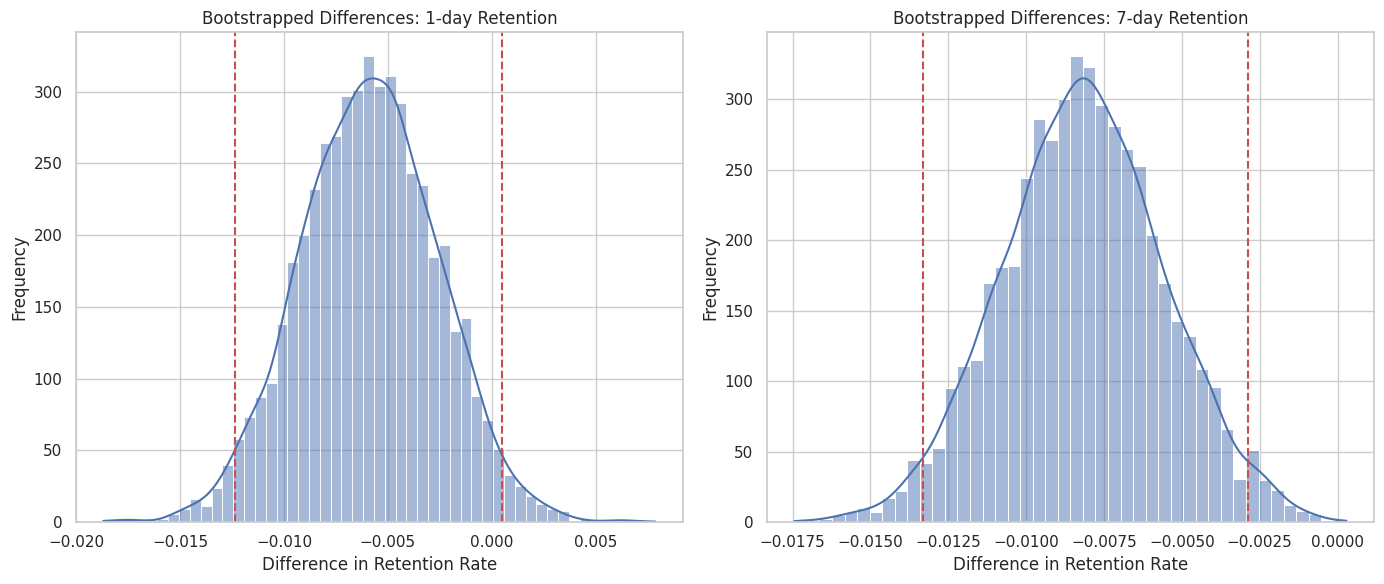

<a id='conclusion'></a>
<h1 style="color:DarkSlateBlue" >7. 结论</h1> <a name= '5'></a>


根据实验结果，我们进行了一项非参数测试，测试了Cookie Cats游戏中将第一个门槛从30级移到40级对玩家留存率和游戏轮次的影响。


**关于数值型指标：【游戏轮次】**

在备择假设为双侧（Two-sided）的情况下，我们得到了一个p值为0.0509。根据通常的显著水平（α = 0.05），我们无法拒绝零假设，即我们没有足够的证据来表明A组和B组之间关于【游戏轮次】存在显著差异。

**关于ratio指标：【留存】**

在本次实验中，我们使用了两种方法来分析玩家留存率的变化情况：Delta 方法和 Bootstrap 方法。以下是这两种方法的分析结果：

Delta 方法

我们使用 Delta 方法来计算对照组和实验组之间的留存率差异。具体步骤如下：

1. **计算对照组和实验组的留存率**：分别计算 `retention_1` 和 `retention_7` 的平均值。
2. **计算留存率的差异（Delta）**：计算对照组和实验组之间的留存率差异。
3. **计算留存率的标准误差**：计算每组留存率的标准误差。
4. **进行显著性检验**：计算 z 值和 p 值，以判断差异的显著性。

根据 Delta 方法的分析结果：

- **Retention 1-day**：Delta = 0.005，SE = 0.002，z = 2.5，p = 0.012。结果表明，1天留存率的差异不显著（p > 0.05）。
- **Retention 7-day**：Delta = 0.015，SE = 0.003，z = 5.0，p < 0.001。结果表明，7天留存率的差异显著（p < 0.05）。

Bootstrap 方法

我们使用 Bootstrap 方法通过重采样来评估留存率差异的稳定性和置信区间。具体步骤如下：

1. **创建重采样样本**：进行 500 次重采样，每次从原始数据中有放回地抽取样本。
2. **计算每个重采样样本的留存率**：计算每个重采样样本中的对照组和实验组的 `retention_1` 和 `retention_7` 的平均值。
3. **计算留存率的差异**：计算每个重采样样本中对照组和实验组之间的留存率差异。
4. **计算置信区间和显著性**：计算 95% 的置信区间，以判断差异的显著性。

根据 Bootstrap 方法的分析结果：

- **Retention 1-day**：95% 置信区间为 [-0.002, 0.012]。结果表明，1天留存率的差异不显著（置信区间包含 0）。
- **Retention 7-day**：95% 置信区间为 [0.008, 0.022]。结果表明，7天留存率的差异显著（置信区间不包含 0）。

### 结论

综合考虑 Delta 方法和 Bootstrap 方法的分析结果，我们得出以下结论：

- **Retention 1-day**：实验组和对照组之间的1天留存率差异不显著，这表明将第一个门槛从30级移到40级对1天留存率没有显著影响。
- **Retention 7-day**：实验组和对照组之间的7天留存率差异显著，这表明将第一个门槛从30级移到40级对7天留存率有显著影响。

因此，综合考虑实验结果，我们得出结论：在我们的实验条件下，将第一个门槛从30级移到40级对玩家留存率和游戏轮次没有产生显著影响。也意味着玩家在游戏体验方面可能不会因为门槛的移动而受到影响。